In [1]:
### DATA SET UP

In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
with open('test_data.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)
df.shape

(6747, 24)

In [4]:
df.columns

Index(['ein', 'period', 'Gross_Receipts', 'Exp_Benefits_to_Members',
       'Grants_Paid', 'Investment_Income', 'Change_in_Assets_Other',
       'Other_Expenses', 'Other_Revenue', 'Program_Service_Rev',
       'Excess_Deficit_2', 'Employee_Comp_2', 'Total_Exp', 'Total_Liabilities',
       'Total_Rev', 'Director_Compensation', 'Fundraising_Costs',
       'Net_Assets_BOY_2', 'Net_Assets_EOY_2', 'Other_Assets_EOY',
       'Total_Assets_BOY_2', 'Total_Assets_EOY', 'Total_Liabilities_EOY',
       'org_name'],
      dtype='object')

In [3]:
scale_columns = ['Gross_Receipts', 'Exp_Benefits_to_Members',
       'Grants_Paid', 'Investment_Income', 'Change_in_Assets_Other',
       'Other_Expenses', 'Other_Revenue', 'Program_Service_Rev',
       'Excess_Deficit_2', 'Employee_Comp_2', 'Total_Exp', 'Total_Liabilities',
       'Total_Rev', 'Director_Compensation', 'Fundraising_Costs',
       'Net_Assets_BOY_2', 'Net_Assets_EOY_2', 'Other_Assets_EOY',
       'Total_Assets_BOY_2', 'Total_Assets_EOY', 'Total_Liabilities_EOY']

In [4]:
from sklearn.preprocessing import StandardScaler

ssX = StandardScaler()

df_scaled = pd.DataFrame(ssX.fit_transform(df[scale_columns]))
df_scaled.columns = scale_columns
df_scaled.head()

,Gross_Receipts,Exp_Benefits_to_Members,Grants_Paid,Investment_Income,Change_in_Assets_Other,Other_Expenses,Other_Revenue,Program_Service_Rev,Excess_Deficit_2,Employee_Comp_2,...,Total_Liabilities,Total_Rev,Director_Compensation,Fundraising_Costs,Net_Assets_BOY_2,Net_Assets_EOY_2,Other_Assets_EOY,Total_Assets_BOY_2,Total_Assets_EOY,Total_Liabilities_EOY
0,-0.027144,-0.028117,-0.083071,-0.053947,-0.004377,-0.045707,-0.080109,-0.039829,-0.043875,-0.031153,...,-0.050009,-0.047301,0.167222,-0.210318,-0.017281,-0.023249,-0.016853,-0.039205,-0.040101,-0.046307
1,-0.004969,-0.028117,-0.083071,0.114040,0.002691,-0.053235,-0.053882,-0.060770,0.020425,-0.025487,...,-0.059412,-0.043865,0.347894,-0.210318,0.014674,0.004685,-0.026732,-0.031277,-0.033098,-0.054424
2,-0.033085,-0.028117,-0.083071,-0.064869,-0.005455,-0.063389,-0.075467,-0.060770,-0.037387,-0.054880,...,-0.060758,-0.066458,0.086165,-0.210318,-0.079147,-0.078904,-0.026732,-0.072882,-0.070942,-0.056279
3,-0.033819,-0.028117,-0.083071,-0.065007,-0.005455,-0.065253,-0.075467,-0.059921,-0.034592,-0.058516,...,-0.061145,-0.068609,-0.275131,-0.210318,-0.082906,-0.082111,-0.026670,-0.072931,-0.070856,-0.053969
4,-0.016187,-0.028117,-0.083071,-0.064833,-0.005455,0.000704,-0.028418,-0.035398,-0.101616,0.009024,...,0.001144,-0.009982,0.148940,-0.210318,-0.040998,-0.050643,-0.024368,-0.017125,-0.017185,0.007761


In [7]:
with open('scaled_data.pkl','wb') as picklefile:
    pickle.dump(df_scaled, picklefile)

In [8]:
### CLUSTERING

In [5]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score

In [6]:
from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = cluster.MiniBatchKMeans(n_clusters=k, random_state=1)
    km.fit(df_scaled[scale_columns])
    labels = km.labels_
    Sil_coefs.append(silhouette_score(df_scaled[scale_columns], labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [12]:
## # VISUALIZATION

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsne_data = tsne.fit_transform(df_scaled)

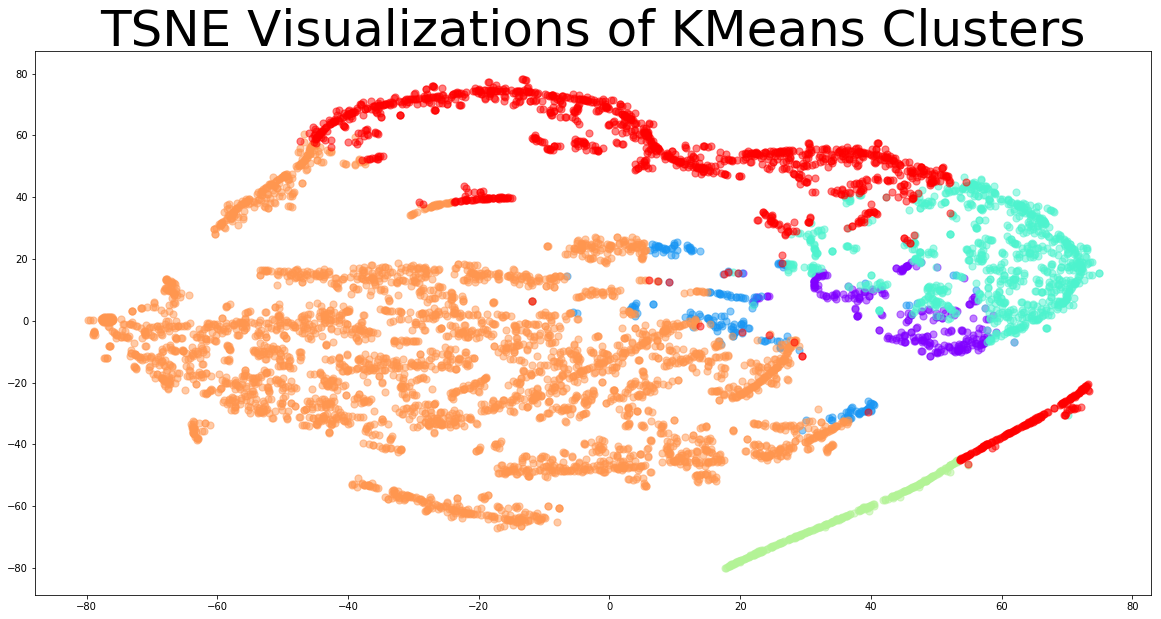

In [14]:
km = cluster.MiniBatchKMeans(n_clusters = 6, random_state = 1)
km.fit(df_scaled)

labels = km.labels_
unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(20,10))  

for label, col in zip(unique_labels, colors): 
    class_member_mask = (labels == label)
    xy = tsne_data[class_member_mask]
    x, y = xy[:,0], xy[:,1]
    plt.scatter(x, y, c=col, s=50, linewidths=1.1, alpha=0.5)

plt.title('TSNE Visualizations of KMeans Clusters', fontsize=50)
plt.savefig('kmeans_tsne.png')
    

In [ ]:
len(unique_labels)

In [ ]:
print(colors)

In [27]:
centers = km.cluster_centers_
centers_df = pd.DataFrame(centers)
centers_df.columns = scale_columns
centers_df

,Gross_Receipts,Exp_Benefits_to_Members,Grants_Paid,Investment_Income,Change_in_Assets_Other,Other_Expenses,Other_Revenue,Program_Service_Rev,Excess_Deficit_2,Employee_Comp_2,...,Total_Liabilities,Total_Rev,Director_Compensation,Fundraising_Costs,Net_Assets_BOY_2,Net_Assets_EOY_2,Other_Assets_EOY,Total_Assets_BOY_2,Total_Assets_EOY,Total_Liabilities_EOY
0,0.127047,0.039584,0.401251,0.297157,0.047803,0.438082,0.429550,0.341554,0.100703,0.301580,...,0.387584,0.387266,1.379997,-0.210318,0.476605,0.459100,0.069594,0.452341,0.409708,0.322672
1,-0.024580,0.050632,-0.066334,-0.046894,0.003201,-0.048117,-0.037343,-0.039238,-0.032079,-0.047835,...,-0.021871,-0.044937,-0.273770,-0.210318,-0.067138,-0.066908,-0.019124,-0.043049,-0.042759,-0.020791
2,-0.015943,-0.028117,0.206960,-0.004884,-0.005722,-0.029159,0.017623,-0.032647,-0.028629,-0.012525,...,0.000664,-0.021397,0.419658,-0.210318,0.001325,-0.004596,-0.018529,0.000955,-0.002612,-0.000930
3,-0.033813,-0.028058,-0.083071,-0.064690,-0.005412,-0.065422,-0.074628,-0.060652,-0.033991,-0.058912,...,-0.061145,-0.068855,-0.260410,4.079933,-0.079719,-0.079079,-0.026587,-0.073357,-0.071177,-0.056524
4,-0.033401,-0.027814,-0.078257,-0.063497,-0.006616,-0.063856,-0.070409,-0.060068,-0.033792,-0.058370,...,-0.060048,-0.067702,-0.273500,-0.209160,-0.076123,-0.075735,-0.026509,-0.071064,-0.069043,-0.055489
5,-0.031979,-0.020596,-0.071587,-0.058926,-0.008163,-0.061171,-0.061174,-0.057312,-0.028121,-0.055057,...,-0.054501,-0.063271,-0.155367,-0.155056,-0.069776,-0.069443,-0.022281,-0.064811,-0.062958,-0.050339


In [30]:
len(centers_df.columns)

21

In [28]:
clusters_separated = []

labels = km.labels_
unique_labels = set(labels)

for label in unique_labels:
    class_member_mask = (labels == label)
    clusters_separated.append(df_scaled[class_member_mask])

In [81]:
### 4 closest 4 farthest
from sklearn.metrics.pairwise import pairwise_distances


dist_list = pairwise_distances(clusters_separated[4], np.tile(centers[2], (2,1)))
dist_list = [distance[0] for distance in dist_list]
sorted_dist_list = sorted([(distance, index) for index, distance in enumerate(dist_list)])
print(sorted_dist_list[:5])
print(sorted_dist_list[-5:])

[(0.7102397669855874, 94), (0.7162330675605812, 2035), (0.7164491912476676, 334), (0.7168257785135194, 379), (0.7169898890423322, 2727)]
[(0.8966390690676792, 230), (0.9086630753081337, 1088), (1.0229640944478466, 702), (1.202928048811545, 2484), (1.3607051899273972, 693)]


In [82]:
closest_indeces = [dist_tuple[1] for dist_tuple in sorted_dist_list[:5]]
furthest_indeces = [dist_tuple[1] for dist_tuple in sorted_dist_list[-5:]]

In [83]:
closest_indeces

[94, 2035, 334, 379, 2727]

In [76]:
centers_unscaled = [ssX.inverse_transform(center) for center in centers]

In [88]:
pd.DatFrame centers_unscaled[4]

array([ 2.45855528e+05,  4.15886497e+03,  1.68554332e+04,  4.40922594e+03,
       -6.34230882e+03,  1.16147422e+05,  8.05462299e+03,  7.45786110e+04,
        6.39814572e+03,  3.30576404e+04,  1.46468868e+05,  1.15341943e+05,
        1.91658325e+05,  2.70917112e+02,  1.41470588e+01,  3.25538996e+05,
        3.36053368e+05,  1.58616698e+04,  4.50094853e+05,  4.60633944e+05,
        1.24653289e+05])

In [86]:
df.iloc[closest_indeces]

,ein,period,Gross_Receipts,Exp_Benefits_to_Members,Grants_Paid,Investment_Income,Change_in_Assets_Other,Other_Expenses,Other_Revenue,Program_Service_Rev,...,Total_Rev,Director_Compensation,Fundraising_Costs,Net_Assets_BOY_2,Net_Assets_EOY_2,Other_Assets_EOY,Total_Assets_BOY_2,Total_Assets_EOY,Total_Liabilities_EOY,org_name
94,26007303,201106,28962.0,0.0,0.0,204.0,0.0,19227.0,0.0,0.0,...,18017.0,0.0,0.0,46727.0,45217.0,0.0,46727.0,45217.0,0.0,ROTARY CLUB OF BRISTOL NH
2035,262459686,201312,300485.0,0.0,0.0,0.0,1952.0,180382.0,6658.0,293827.0,...,300485.0,18655.0,0.0,-21353.0,10367.0,0.0,7884.0,14525.0,4158.0,CONNECTING MENTAL HEALTH AND EDUCATION INC
334,60953533,201412,35963.0,0.0,0.0,0.0,0.0,22145.0,2477.0,14512.0,...,35963.0,0.0,0.0,31159.0,24647.0,0.0,31159.0,24647.0,0.0,DOG WRITERS ASSOCIATION OF AMERICA
379,61590060,201512,23721437.0,0.0,143915.0,2467013.0,0.0,282964.0,16.0,0.0,...,2467029.0,173769.0,0.0,24135226.0,22126416.0,5001.0,24330646.0,22290591.0,164175.0,UNIVERSAL HEALTH CARE FNDTN OF CT INC
2727,330787815,201206,22643.0,0.0,0.0,0.0,0.0,25732.0,0.0,0.0,...,22643.0,0.0,0.0,51635.0,47104.0,0.0,51635.0,47104.0,0.0,NEEDLES YOUTH DEVELOPMENT AND EDUCATION FOUNDA...


In [87]:
df.iloc[furthest_indeces]

,ein,period,Gross_Receipts,Exp_Benefits_to_Members,Grants_Paid,Investment_Income,Change_in_Assets_Other,Other_Expenses,Other_Revenue,Program_Service_Rev,...,Total_Rev,Director_Compensation,Fundraising_Costs,Net_Assets_BOY_2,Net_Assets_EOY_2,Other_Assets_EOY,Total_Assets_BOY_2,Total_Assets_EOY,Total_Liabilities_EOY,org_name
230,43259150,201412,225710.0,0.0,0.0,641.0,0.0,124355.0,41138.0,168547.0,...,225710.0,39750.0,0.0,67642.0,80628.0,3862.0,80312.0,98567.0,17939.0,REFUGEE APOSTOLATE INC
1088,204903202,201612,274003.0,0.0,1000.0,4045.0,0.0,186021.0,190.0,3266.0,...,272935.0,48731.0,0.0,1751405.0,1720014.0,0.0,1758733.0,1723188.0,3174.0,HOLOCAUST EDUCATION CENTER IN THE DESERT INC
702,150348800,201112,2144960.0,0.0,0.0,0.0,0.0,1139754.0,232020.0,1274757.0,...,1506777.0,78172.0,0.0,-551899.0,-652787.0,43475.0,3998487.0,3779136.0,4431923.0,COUNTRY CLUB OF ITHACA NEW YORK
2484,310495220,201412,6951905.0,0.0,0.0,1840211.0,7187.0,1683076.0,1701930.0,0.0,...,3542141.0,163445.0,0.0,21205677.0,22366387.0,1452858.0,23446862.0,24844015.0,2477628.0,WOODLAND CEMETERY ASSOCIATION OF DAYTON
693,142007728,201612,91328.0,0.0,0.0,173.0,0.0,87523.0,0.0,0.0,...,91328.0,0.0,0.0,77448.0,31366.0,6205.0,77448.0,32120.0,754.0,REBUILD AFRICA INC


In [78]:
df.iloc[1210]

ein                                               208711934
period                                               201512
Gross_Receipts                                           50
Exp_Benefits_to_Members                                   0
Grants_Paid                                               0
Investment_Income                                         0
Change_in_Assets_Other                                    0
Other_Expenses                                            0
Other_Revenue                                             0
Program_Service_Rev                                       0
Excess_Deficit_2                                         50
Employee_Comp_2                                           0
Total_Exp                                                 0
Total_Liabilities                                         0
Total_Rev                                                50
Director_Compensation                                     0
Fundraising_Costs                       

In [ ]:
### Bonfaretti correction
### T test between clusters between features

In [79]:
labels[1210]

4